In [1]:
fine_tuning_data = "<PATH>/led3_score/5_paper/data/experiment3_fine_tuning.csv"

import pandas
fine_tuning = pandas.read_csv(fine_tuning_data)
fine_tuning.head()

,epoch,loss_train,loss_valid,valid_ratio,unique_ratio,desire_ratio,mean_train_loss
0,1,NaN,0.430881,1.0,NaN,0.997191,0.412560
1,2,NaN,0.427198,1.0,NaN,0.994382,0.411121
2,3,NaN,0.422317,1.0,NaN,0.988764,0.406456
3,4,NaN,0.416414,1.0,NaN,0.991573,0.400234
4,5,NaN,0.411141,1.0,NaN,0.994382,0.393973


In [3]:
fine_tuning.columns


Index(['epoch', 'loss_train', 'loss_valid', 'valid_ratio', 'unique_ratio',
       'desire_ratio', 'mean_train_loss'],
      dtype='object')

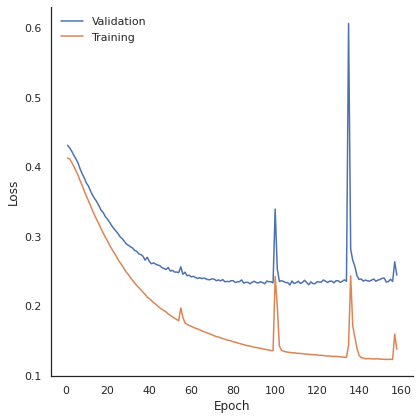

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'fine_tuning' is your DataFrame with the specified columns
# fine_tuning = pd.read_csv('your_data_file.csv')  # Load your DataFrame if needed

# Set the style of the visualization
sns.set(style="white")

# Create a figure and a set of subplots
plt.figure(figsize=(6, 6))

# Plotting each column against 'epoch'
#sns.lineplot(x='epoch', y='loss_train', data=fine_tuning, label='Train Loss')
sns.lineplot(x='epoch', y='loss_valid', data=fine_tuning, label='Validation')
#sns.lineplot(x='epoch', y='valid_ratio', data=fine_tuning, label='Validation Ratio')
#sns.lineplot(x='epoch', y='unique_ratio', data=fine_tuning, label='Unique Ratio')
#sns.lineplot(x='epoch', y='desire_ratio', data=fine_tuning, label='Desire Ratio')
sns.lineplot(x='epoch', y='mean_train_loss', data=fine_tuning, label='Training')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.title('Fine Tuning Metrics Over Epochs')

sns.despine(left=False, bottom=False)
plt.tight_layout()

# Show the legend
legend= plt.legend()
legend.get_frame().set_edgecolor('none')

plt.savefig("./pdfs/experiment_3_model_fine_tuning.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_model_fine_tuning.svg", bbox_inches='tight', format="svg")

# Display the plot
plt.show()

In [25]:
epsilon = "<PATH>/led3_score/5_paper/data/experiment_3_rl_summary.csv"

import pandas
epsilon = pandas.read_csv(epsilon)
epsilon.head()

,Desirability,XGBClassifier,Epoch,Name,epsilon,LED3Scorer,SA
0,0.972301,0.960192,79,Baseline,0.01,NaN,NaN
1,0.656823,0.631774,5,Baseline,0.01,NaN,NaN
2,0.756619,0.722706,6,Baseline,0.01,NaN,NaN
3,0.832383,0.798899,7,Baseline,0.01,NaN,NaN
4,0.877393,0.837352,8,Baseline,0.01,NaN,NaN


In [41]:
#get the rows with the highest epoch for each name and epsilon
grouped_epsilon = epsilon.groupby(["Name", "epsilon"]).max()
grouped_epsilon.reset_index(inplace=True)
grouped_epsilon

# rename Name entries
# Baseline to QSAR Only

grouped_epsilon["Name"] = grouped_epsilon["Name"].replace("Baseline", "QSAR Only")
grouped_epsilon["Name"] = grouped_epsilon["Name"].replace("LED3Score-Casp10k", "Led3-Caspyrus10k")
grouped_epsilon["Name"] = grouped_epsilon["Name"].replace("LED3Score-ChEMBL200k", "Led3-ChEMBL200k")
grouped_epsilon["Name"] = grouped_epsilon["Name"].replace("ZINCScore-casp10k", "Zinc-Caspyrus10k")
grouped_epsilon["Name"] = grouped_epsilon["Name"].replace("ZINCScore-ChEMBL200k", "Zinc-ChEMBL200k")

# rename Name column to Score
grouped_epsilon.rename(columns={"Name": "Score","XGBClassifier": "QSAR"}, inplace=True)

# sort rowns by QSAR Only, SAScore, Led3-Caspyrus10k, Led3-ChEMBL200k, Zinc-Caspyrus10k, Zinc-ChEMBL200k in the Score column

<Figure size 432x432 with 0 Axes>

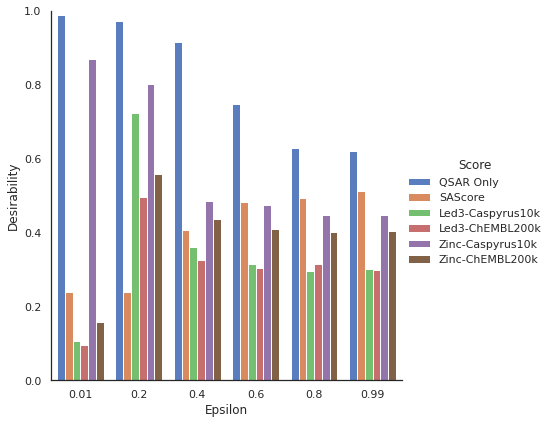

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

plt.figure(figsize=(6, 6))  # Set the figure size
    
# Create the catplot
g = sns.catplot(
    x="epsilon",
    y="Desirability",
    hue="Score",
    kind="bar",
    data=grouped_epsilon,
    height=6,
    aspect=1,
    palette="muted",
    hue_order=["QSAR Only","SAScore", "Led3-Caspyrus10k", "Led3-ChEMBL200k", "Zinc-Caspyrus10k", "Zinc-ChEMBL200k"],
)

# Set y axis limits
g.set(ylim=(0, 1))

# Rotate x-axis labels
#g.set_xticklabels(rotation=45)

# Set labels and title
g.set_axis_labels("Epsilon", "Desirability")
#g.fig.suptitle("Molecules Solved by Led3 and Zinc Building Blocks", y=1.05)

plt.savefig("./pdfs/experiment_3_rl_summary_desirability.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_rl_summary_desirability.svg", bbox_inches='tight', format="svg")
# Show the plot
plt.show()

<Figure size 432x432 with 0 Axes>

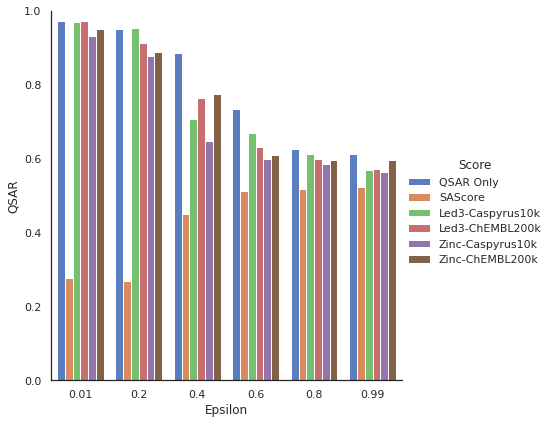

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

plt.figure(figsize=(6, 6))  # Set the figure size
    
# Create the catplot
g = sns.catplot(
    x="epsilon",
    y="QSAR",
    hue="Score",
    kind="bar",
    data=grouped_epsilon,
    height=6,
    aspect=1,
    palette="muted",
    hue_order=["QSAR Only","SAScore", "Led3-Caspyrus10k", "Led3-ChEMBL200k", "Zinc-Caspyrus10k", "Zinc-ChEMBL200k"],
)

# Set y axis limits
g.set(ylim=(0, 1))

# Rotate x-axis labels
#g.set_xticklabels(rotation=45)

# Set labels and title
g.set_axis_labels("Epsilon", "QSAR")
#g.fig.suptitle("Molecules Solved by Led3 and Zinc Building Blocks", y=1.05)

plt.savefig("./pdfs/experiment_3_rl_summary_qsar.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_rl_summary_qsar.svg", bbox_inches='tight', format="svg")

# Show the plot
plt.show()